In [1]:
import os, glob
from astropy.io import fits

from BreyoSpec import BreyoSpec

In [10]:
#files = "C:\\Users\\noahf\\Documents\\School\\Junior-Semester-1\\ObsAstro\\2021-11-03\\duringTransitOutput\\WASP-93b-2a_20211104T010459.fit"
postTransit = '/home/ubuntu/Documents/ObsAstro/Data/postTransitOutput/'
postTransitPaths = glob.glob(postTransit+"*")

duringTransit = '/home/ubuntu/Documents/ObsAstro/Data/duringTransitOutput/'
transitPaths = glob.glob(duringTransit+"*")

In [11]:
combSpec = BreyoSpec(transitPaths) # combined spectrum
hostSpec = BreyoSpec(postTransitPaths) # host star spectrum

/home/ubuntu/Documents/ObsAstro/ExoSpec/BreyoSpec.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.flux = np.array(normFluxes)
/home/ubuntu/Documents/ObsAstro/ExoSpec/BreyoSpec.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.wave = np.array(normWaves)
/home/ubuntu/Documents/ObsAstro/ExoSpec/BreyoSpec.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

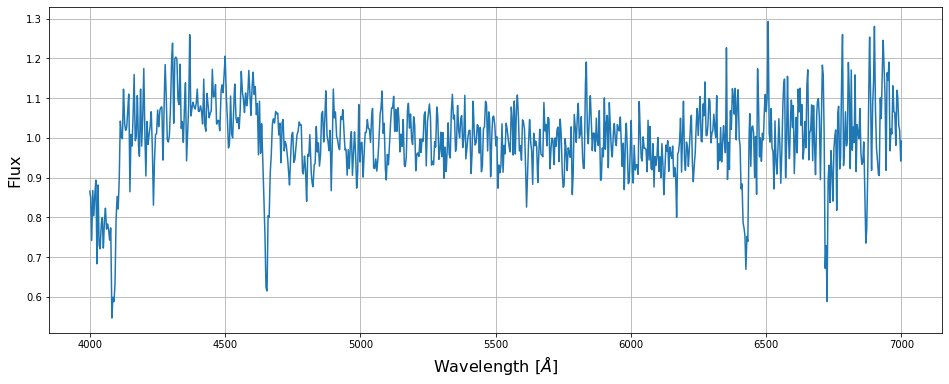

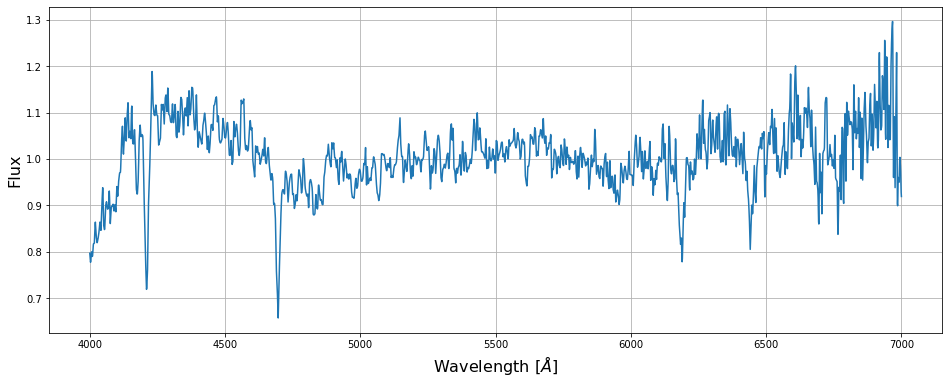

In [13]:
combSpec.plot()
hostSpec.plot()

In [16]:
[print(len(combSpec.wave[i])) for i in range(len(combSpec.wave))]
[print(len(hostSpec.wave[i])) for i in range(len(hostSpec.wave))]

4630
3478
3448
2549
3206
3497
3323
3311
3155


[None, None, None, None, None]